In [526]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.proportion import proportions_ztest

# Read the data as a data frame

In [527]:

InsuranceCSV = pd.read_csv('insurance.csv')


In [528]:
Insurance_dataFrame = pd.DataFrame(InsuranceCSV)

In [609]:
Insurance_dataFrame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Shape of the data

In [531]:
print(Insurance_dataFrame.shape)

(1338, 7)


# Data type of each attribute


In [560]:
Insurance_dataFrame.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Checking the presence of missing values

In [533]:
Insurance_dataFrame.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [534]:
Insurance_dataFrame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [610]:
print('No missing values present')

No missing values present


# 5 point summary of numerical attributes

In [535]:
Insurance_dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [561]:
Insurance_dataFrame["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [557]:
Insurance_dataFrame["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [558]:
Insurance_dataFrame["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [559]:
Insurance_dataFrame["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

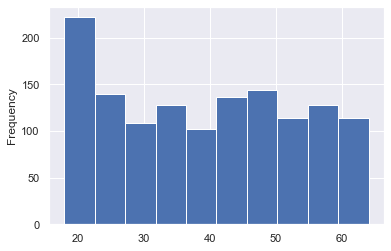

In [562]:
Insurance_dataFrame['age'].plot(kind='hist')

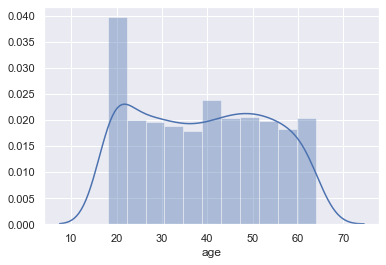

In [563]:
sns.distplot(Insurance_dataFrame['age'])

# BMI

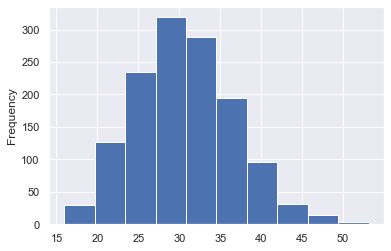

In [564]:
Insurance_dataFrame['bmi'].plot(kind='hist')

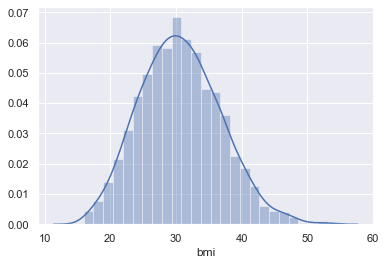

In [109]:
sns.distplot(Insurance_dataFrame['bmi'])

# Charges

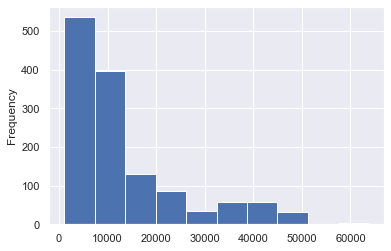

In [565]:
Insurance_dataFrame['charges'].plot(kind='hist')

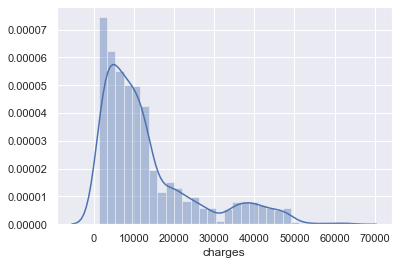

In [110]:
sns.distplot(Insurance_dataFrame['charges'])

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
Pearson’s first coefficient of skewness
# subtract the mean from the mode, and then divide this difference by the standard deviation of the data


In [568]:
#Age
difference =  Insurance_dataFrame["age"].mean() - Insurance_dataFrame["age"].mode()
PearsonsFirstCoefficientSkewnessForAge = difference/Insurance_dataFrame["age"].std()
PearsonsFirstCoefficientSkewnessForAge


0    1.509401
dtype: float64

In [569]:
#Bmi
difference =  Insurance_dataFrame["bmi"].mean() - Insurance_dataFrame["bmi"].mode()
PearsonsFirstCoefficientSkewnessForBmi = difference/Insurance_dataFrame["bmi"].std()
PearsonsFirstCoefficientSkewnessForBmi

0   -0.268375
dtype: float64

In [571]:
#Charges
difference =  Insurance_dataFrame["charges"].mean() - Insurance_dataFrame["charges"].mode()
PearsonsFirstCoefficientSkewnessForCharges = difference/Insurance_dataFrame["charges"].std()
PearsonsFirstCoefficientSkewnessForCharges

0    0.960433
dtype: float64

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

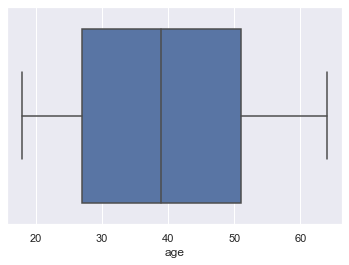

In [575]:
sns.boxplot(Insurance_dataFrame['age'])

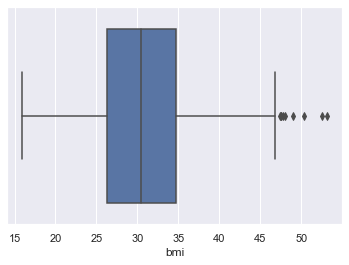

In [574]:
sns.boxplot(Insurance_dataFrame['bmi'])

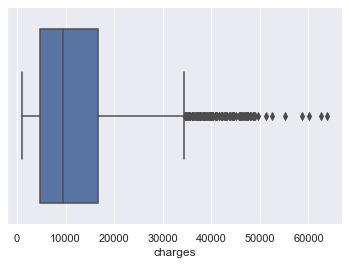

In [573]:
sns.boxplot(Insurance_dataFrame['charges'])

# Distribution of categorical columns (include children)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


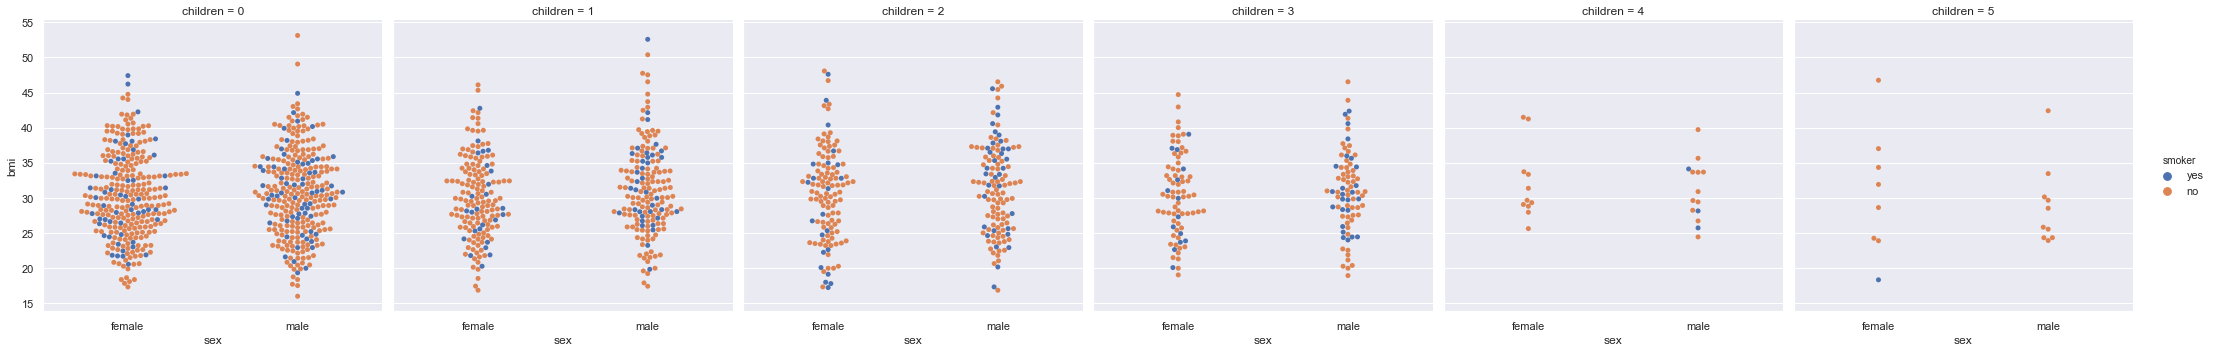

In [579]:
sns.factorplot(x="sex", 
               y="bmi", 
               hue="smoker", 
               col="children", 
               data=Insurance_dataFrame, 
               kind="swarm")

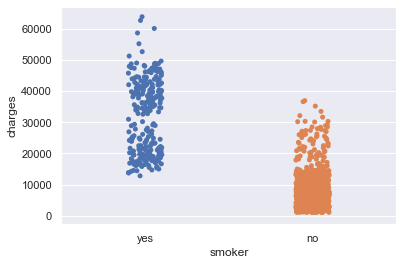

In [580]:
sns.stripplot(Insurance_dataFrame['smoker'], Insurance_dataFrame['charges'], jitter=True)

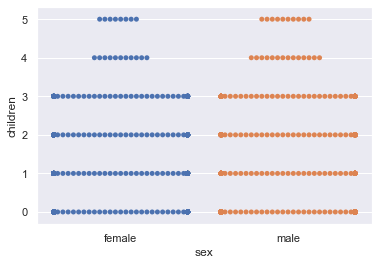

In [581]:
sns.swarmplot(Insurance_dataFrame['sex'], Insurance_dataFrame['children'])

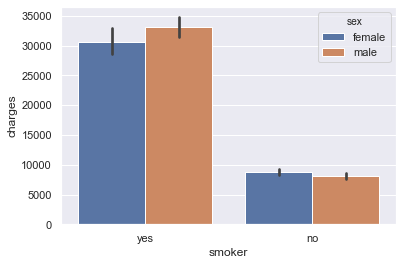

In [576]:
sns.barplot(Insurance_dataFrame['smoker'], Insurance_dataFrame['charges'], hue=Insurance_dataFrame['sex'])

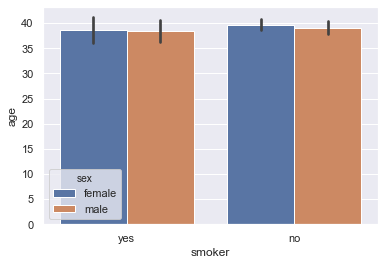

In [582]:
sns.barplot(Insurance_dataFrame['smoker'], Insurance_dataFrame['age'], hue=Insurance_dataFrame['sex'])

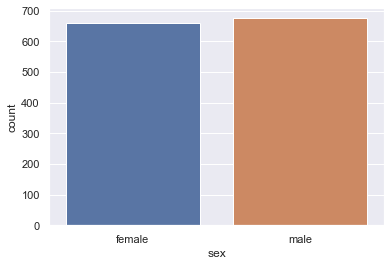

In [583]:
sns.countplot(Insurance_dataFrame['sex'])

# Pair plot that includes all the columns of the data frame

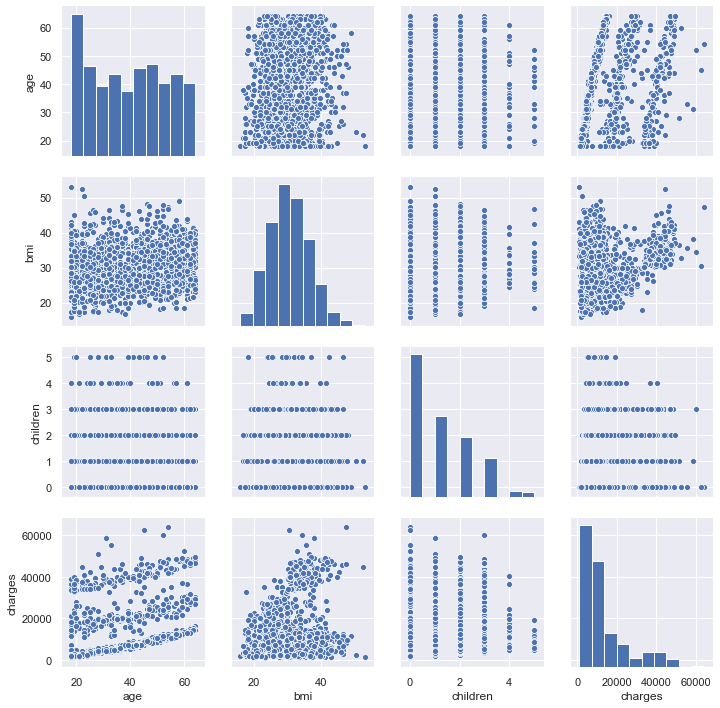

In [584]:
sns.pairplot(Insurance_dataFrame)

# Do charges of people who smoke differ significantly from the people who don't?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A6581A898>,
      dtype=object)

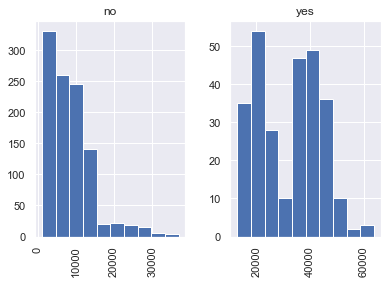

In [585]:
Insurance_dataFrame.hist(by='smoker',column = 'charges')

In [586]:
Smokers = Insurance_dataFrame.groupby("smoker")
Smokers['charges'].describe().T

smoker,no,yes
count,1064.000000,274.000000
mean,8434.268298,32050.231832
std,5993.781819,11541.547176
min,1121.873900,12829.455100
25%,3986.438700,20826.244213
50%,7345.405300,34456.348450
75%,11362.887050,41019.207275
max,36910.608030,63770.428010


In [587]:
SampleSmokers = Insurance_dataFrame[Insurance_dataFrame['age']==19]
SampleSmokers.smoker.value_counts()

no     50
yes    18
Name: smoker, dtype: int64

In [588]:
NonSmoker = SampleSmokers[SampleSmokers['smoker'] == 'no'].charges.iloc[:-32]
NonSmoker.count()

18

In [589]:
Smoker = SampleSmokers[SampleSmokers['smoker'] == 'yes'].charges
Smoker.count()

18

In [590]:
v1, v2 = np.var(NonSmoker) , np.var(Smoker)
print(v1,v2)

579506.7436445024 88641672.4309857


# Variances of charges of smoker is higher than it is for non-smoker. But is the difference statistically significant?
Ho : Variation in charges of smoker and non-smoker are equal ie smoker_charges = non-smoker_charges

Ha : Variation in charges of smoker is greater than it is in non-smoker ie smoker_charges > non-smoker_charges

In [591]:
count = 18  # number of samples
dof = count - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 27.59    # critical chi_squared statistic from the table 

In [592]:
chi = (dof*v2)/v1

if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

Since the test statistic is more than the critical value, we reject the null


# Does bmi of males differ significantly from that of females?


In [593]:
GenderGroup = Insurance_dataFrame.groupby('sex')
GenderGroup["bmi"].describe().T


sex,female,male
count,662.000000,676.000000
mean,30.377749,30.943129
std,6.046023,6.140435
min,16.815000,15.960000
25%,26.125000,26.410000
50%,30.107500,30.687500
75%,34.313750,34.992500
max,48.070000,53.130000


# Chi square test of variance

In [594]:
Sample32 = Insurance_dataFrame[Insurance_dataFrame['age'] == 18]

In [597]:
Sample32.sex.value_counts()

male      36
female    33
Name: sex, dtype: int64

In [595]:
sample_male = Sample32[Sample32['sex'] == 'male'].bmi.iloc[:-3]


In [596]:

sample_female = Sample32[Sample32['sex'] == 'female'].bmi

In [598]:
v1, v2 = np.var(sample_female) , np.var(sample_male)
print(v1,v2)

33.522264325068875 44.446157483930214


# Variances of bmi of men is higher than it is for women. But is the difference statistically significant?
Ho : Variation in bmi of men and women are equal ie Men_BMI = Women_BMI

Ha : Variation in bmi of men is greater than it is in women ie Men_BMI> Women_BMI

In [599]:
n = 33  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 46.19    # critical chi_squared statistic from the table 

In [600]:
chi = (dof*v2)/v1

if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

Since the test statistic is less than the critical value, we fail to reject the null


# Is the proportion of smokers significantly different in different genders?
Ho = The proportions are equal

Ha = The two proportions are not equal

In [611]:
female_smokers = Insurance_dataFrame[Insurance_dataFrame['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
female_smokers


115

In [612]:
male_smokers = Insurance_dataFrame[Insurance_dataFrame['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
male_smokers

159

In [613]:
no_of_females = Insurance_dataFrame.sex.value_counts()[1] # number of females in the data
no_of_females

662

In [614]:
no_of_males = Insurance_dataFrame.sex.value_counts()[0] #number of males in the data
no_of_males

676

In [615]:
proportion_of_female_smoker = round((female_smokers/no_of_females) * 100)
proportion_of_female_smoker

17.0

In [616]:
proportion_of_male_smoker = round((male_smokers/no_of_males) * 100)
proportion_of_male_smoker

24.0

In [617]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [no_of_females, no_of_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


# Is the distribution of bmi across women with no children, one child and two children, the same ?
Ho = mu1 = mu2  = mu3

Ha = any one population means is not equal

# Method1

In [505]:
female_with_0_Children_bmi = Insurance_dataFrame[(Insurance_dataFrame['sex'] == 'female') & (Insurance_dataFrame['children'] == 0)].bmi.iloc[:-170]

In [464]:
female_with_1_Children_bmi = Insurance_dataFrame[(Insurance_dataFrame['sex'] == 'female') & (Insurance_dataFrame['children'] == 1)].bmi.iloc[:-39]

In [414]:
female_with_2_Children_bmi = Insurance_dataFrame[(Insurance_dataFrame['sex'] == 'female') & (Insurance_dataFrame['children'] == 2)].bmi

In [482]:
mean1 = female_with_0_Children_bmi.mean()

In [483]:
mean2 = female_with_1_Children_bmi.mean()

In [484]:
mean3 = female_with_2_Children_bmi.mean()

In [501]:
var1 = female_with_0_Children_bmi.var()

In [502]:
var2 = female_with_1_Children_bmi.var()

In [503]:
var3 = female_with_2_Children_bmi.var()

In [504]:
MSE = ((var1 + var2 + var3))/3
MSE

36.667055582063334

In [506]:
grandMean = (mean1 + mean2 + mean3)/3
grandMean

30.30112044817926

In [500]:
MSB = ( np.square(mean1 - grandMean)+ np.square(mean2 - grandMean) + np.square(mean3 - grandMean)) * 119 / 2
MSB

14.150437885153242

In [508]:
F_Ratio  = MSB/MSE
F_Ratio

0.38591693989400405

In [ ]:
pvalue = 0.680113 and In this example, p value is 0.680113 and it is greater than our chosen level of signifance at 5%

So the statistical decision is fail to reject the null hypothesis at 5% level of significance.

# Method two

In [513]:
female_df = pd.DataFrame()

df1            = pd.DataFrame({'Children': 'Z', 'Female_BMI':female_with_0_Children_bmi})
df2            = pd.DataFrame({'Children': 'O', 'Female_BMI':female_with_1_Children_bmi})
df3            = pd.DataFrame({'Children': 'T', 'Female_BMI':female_with_2_Children_bmi})

In [514]:
female_df = female_df.append(df1) 
female_df = female_df.append(df2) 
female_df = female_df.append(df3) 

Text(0.5, 1.0, 'Distribution of bmi')

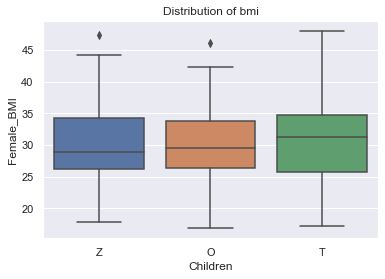

In [515]:
sns.boxplot(x = "Children", y = "Female_BMI", data = female_df)
plt.title('Distribution of bmi')

In [516]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Female_BMI ~ Children', data = female_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
Children     28.300876    2.0  0.385917  0.680113
Residual  12980.137676  354.0       NaN       NaN


In [ ]:
pvalue = 0.680113 and In this example, p value is 0.680113 and it is greater than our chosen level of signifance at 5%

So the statistical decision is fail to reject the null hypothesis at 5% level of significance.